Моделирование парадокса Монти Холла. Одна из известных задач теории вероятностей, решение которой на первый взгляд протеворечит здравому смыслу. Эта задача не является парадоксом в узком смысле этого слова, т к не содержит в себе противоречия, она называется парадоксом, потому что ее решение может показаться неожиданным. Более того, многим людям бывает сложно принять правильное решение даже после того, как его им рассказали. 

Представьте, что вы стали участником игры, в котрой вам нужно выбрать одну из трех дверей. За одной из дверей находится автомобиль, за двумя другими дверями козы. Вы вибираете одну из дверей, например номер 1, после этого ведущий, котрый знает, где находится автомобиль, а где козы, открывает одну из оставшихся дверей, например номер 3, за которой находится коза. После этого он спрашивает вас - не желаете ли вы изменеить свой выбор и выбрать дверь номер 2? Увеличатся ли ваши шансы выиграть автомобиль, если вы примете предложение ведущего и измените свой выбор?

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
N = 1000 # Количество экспериментов

# Создаем таблицу для каждого эксперимента с тремя дверьми
games = pd.DataFrame('-', index=range(N), columns=['Door_0', 'Door_1', 'Door_2'])

random.seed(1)

# Для каждого эксперимента за одну из дверей ставим автомобиль
for i in range(len(games)):
    games.iat[i, random.choice([0,1,2])] = 'Car'
    
games # Смотрим на часть полученных данных

,Door_0,Door_1,Door_2
0,Car,-,-
1,-,-,Car
2,Car,-,-
3,-,Car,-
4,Car,-,-
...,...,...,...
995,Car,-,-
996,-,Car,-
997,Car,-,-
998,-,-,Car


In [3]:
# Взглянем на сумарное количество машин за каждой дверью
(games == 'Car').sum()

Door_0    326
Door_1    328
Door_2    346
dtype: int64

In [4]:
# Сейчас игрок будет делать свой выбор двери. 
# Мы также случайным образом сформируем последовательность из 1000 случайных выборов двери.
# Чтобы уменьшить эффект случайности мы будем использовать этот выбор для эксперимента, где мы НЕ будем менять свое решение,
# и где мы изменим свое решение.

random.seed(3)

games['First_choice'] =  pd.Series([random.choice([0,1,2]) for _ in range(N)])
games

,Door_0,Door_1,Door_2,First_choice
0,Car,-,-,0
1,-,-,Car,2
2,Car,-,-,2
3,-,Car,-,0
4,Car,-,-,1
...,...,...,...,...
995,Car,-,-,1
996,-,Car,-,0
997,Car,-,-,1
998,-,-,Car,0


In [5]:
# Взглянем на сумарное количество каждого выбора:
games['First_choice'].value_counts()

2    338
1    334
0    328
Name: First_choice, dtype: int64

In [6]:
# Теперь давайте экспериментально определим сколько раз мы выиграем, если не будем менять решение.

games['Not_changed'] = games.apply(lambda g: ('Win' if g.iat[g['First_choice']] == 'Car' else 'loss'), axis=1)
games

,Door_0,Door_1,Door_2,First_choice,Not_changed
0,Car,-,-,0,Win
1,-,-,Car,2,Win
2,Car,-,-,2,loss
3,-,Car,-,0,loss
4,Car,-,-,1,loss
...,...,...,...,...,...
995,Car,-,-,1,loss
996,-,Car,-,0,loss
997,Car,-,-,1,loss
998,-,-,Car,0,loss


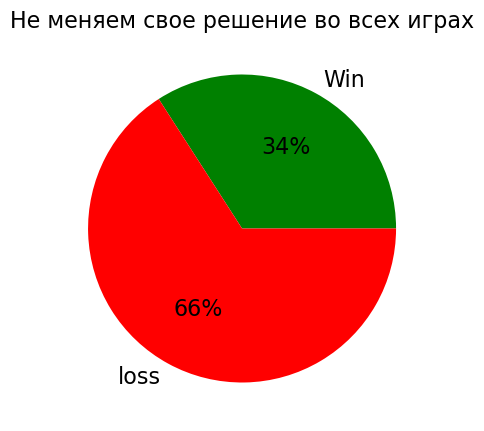

In [7]:
# Расчитаем процент выигрышей, когда мы делали выбор и потом его не меняли.
plt.figure(figsize=(5,5))
val_counts = pd.DataFrame(games['Not_changed'].value_counts()).sort_index()
plt.pie(val_counts['Not_changed'], labels=val_counts.index, colors=['green', 'red'], autopct='%.0f%%', textprops={'fontsize':16, 'color':'black'})
title_obj = plt.title('Не меняем свое решение во всех играх', )
plt.setp(title_obj, color='black')
plt.setp(title_obj, fontsize='16')
plt.show()

Что ожидали, то и получили: выигрыш в районе 33%. Т е вероятность победы 1/3. Как она была в начале игры, так она и осталась.
Можно считать, что игрок не воспользовался представленной возможностью повлиять на рузультат. 

Эксперимент 2. Теперь, когда будет открыта пустая дверь и ведущий предложит нам изменить наш выбор, то мы всегда буддем соглашаться. 

In [8]:
# Для начала я удалю столбец Not_changed, чтобы он нас не отвлекал.
games.drop('Not_changed', axis=1, inplace=True)
games

,Door_0,Door_1,Door_2,First_choice
0,Car,-,-,0
1,-,-,Car,2
2,Car,-,-,2
3,-,Car,-,0
4,Car,-,-,1
...,...,...,...,...
995,Car,-,-,1
996,-,Car,-,0
997,Car,-,-,1
998,-,-,Car,0


Первый выбор у нас уже был сделан (First_choice). Может мы правильно угадали, а может быть и нет но ведущий в любом случае откроет пустую дверь, которую мы не выбрали и предложит нам изменить свой выбор.

In [9]:
# давайте выберем пустую дверь, котрую откроет ведущий, тут два условия (она пустая и ее выбрал игрок).
# предлагаю открывать дверь, удовлетворяющую условиям, случайным образом. Хотя в этом эксперименте это не играет никакой роли и
# можно было открывать первую попавшуюся. 

random.seed(5)

# Функция, котрая будет выбирать какую дверь будем открывать.
def open_empty_door(game: pd.Series):
    doors = {0,1,2}  # всего доступно 3 двери
    doors.discard(game['First_choice']) # убираем ту, которую выбрал игрок
    
    # теперь находим и убираем дверь, за которой стоит автомобиль, так как ее нельзя открывать
    ind_car = list(game['Door_0':'Door_2'] == 'Car').index(True)
    doors.discard(ind_car)
    
    # здесь у нас может остаться либо одна дверь, либо две
    if len(doors) == 1:                    # если осталась одна дверь
        return doors.pop()                 # то возвращаем именно ее
    else:                                  # иначе осталось две двери
        return random.choice(list(doors))  # случайным образом выбираем одну из них
        
# Добавляем колонку с номером двери, которую откроет ведущий. Она точно пустая и ее не выбрал игрок. 
games['Empty_door'] = games.apply(open_empty_door, axis=1)
games

,Door_0,Door_1,Door_2,First_choice,Empty_door
0,Car,-,-,0,2
1,-,-,Car,2,1
2,Car,-,-,2,1
3,-,Car,-,0,2
4,Car,-,-,1,2
...,...,...,...,...,...
995,Car,-,-,1,2
996,-,Car,-,0,2
997,Car,-,-,1,2
998,-,-,Car,0,1


In [10]:
# теперь изменим выбранную дверь, на другую закрытую. Т е наш выбор будет отличаться от First_choice и Empty_door, так как
# остается последний вариант, то его и выбираем, и воспользуемся тем, что сумма номеров дверей всегда равна 3(0+1+2).
# А значит если я из 3 вычту номер открытой пустой двери и номер двери, который я раньше выбрал, то получу номер оставшейся
# двери.

games['Changed_choice'] = 3 - games['Empty_door'] - games['First_choice']
games

,Door_0,Door_1,Door_2,First_choice,Empty_door,Changed_choice
0,Car,-,-,0,2,1
1,-,-,Car,2,1,0
2,Car,-,-,2,1,0
3,-,Car,-,0,2,1
4,Car,-,-,1,2,0
...,...,...,...,...,...,...
995,Car,-,-,1,2,0
996,-,Car,-,0,2,1
997,Car,-,-,1,2,0
998,-,-,Car,0,1,2


In [11]:
# Теперь можно определить, выиграли ли мы или нет.
games['Changed'] = games.apply(lambda g: ('Win' if g.iat[g['Changed_choice']] == 'Car' else 'loss'), axis=1)
games

,Door_0,Door_1,Door_2,First_choice,Empty_door,Changed_choice,Changed
0,Car,-,-,0,2,1,loss
1,-,-,Car,2,1,0,loss
2,Car,-,-,2,1,0,Win
3,-,Car,-,0,2,1,Win
4,Car,-,-,1,2,0,Win
...,...,...,...,...,...,...,...
995,Car,-,-,1,2,0,Win
996,-,Car,-,0,2,1,Win
997,Car,-,-,1,2,0,Win
998,-,-,Car,0,1,2,Win


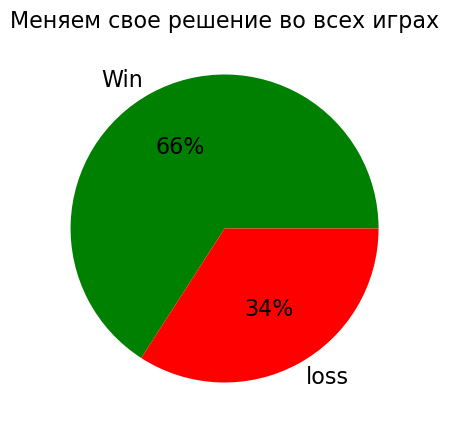

In [12]:
# Расчитаем процент выигрышей, когда мы делали выбор и потом его изменили. 
plt.figure(figsize=(5,5))
val_counts = pd.DataFrame(games['Changed'].value_counts()).sort_index()
plt.pie(val_counts['Changed'], labels=val_counts.index, colors=['green', 'red'], autopct='%.0f%%', textprops={'fontsize':16, 'color':'black'})
title_obj = plt.title('Меняем свое решение во всех играх', )
plt.setp(title_obj, color='black')
plt.setp(title_obj, fontsize='16')
plt.show()

Получилось, что вероятность выигрыша становится 2/3, если мы будем всегда менять наш первоначальный выбор для этой задачи!!!


Эксперимент 3. Теперь когда будет открыта пустая дверь и ведущий предложит нам изменить наш выбор, то мы будем делать новый выбор. Если раньше мы во всех случаях либо не изменяли наш выбор, либо наоборот изменяли его, то в этот раз мы будем случайным образом определять какую же дверь выбрать, но уже из двух дверей. В этом случае мы ожидаем получить вероятность 50/50.

In [13]:
# Для начала удалим колонки, которые нам уже не нужны.
games.drop(['Changed_choice', 'Changed'], axis=1, inplace=True)
games

,Door_0,Door_1,Door_2,First_choice,Empty_door
0,Car,-,-,0,2
1,-,-,Car,2,1
2,Car,-,-,2,1
3,-,Car,-,0,2
4,Car,-,-,1,2
...,...,...,...,...,...
995,Car,-,-,1,2
996,-,Car,-,0,2
997,Car,-,-,1,2
998,-,-,Car,0,1


На данный момент мы сделали наш первый выбор, затем ведущий открыл пустую дверь и спрашивает, хотим ли мы изменить наш выбор. В этот раз мы будем случайным образом выбирать одну из закрытых дверей. Фактически, не имеет смысл, как завершится наш первый выбор. Мы про это забываем и начинаем как бы вторую независимую игру, но где выбор из двух дверей.

In [14]:
random.seed(7)

# делаем случайный выбор из двух закрытых дверей
def random_door(game: pd.Series):
    d = [0,1,2]                         # изначально 3 двери
    d.remove(game.at['Empty_door'])     # убираем открытую
    return random.choice(d)             # и из оставшихся случайным образом выбираем

games['Random_choice'] = games.apply(random_door, axis=1)
games

,Door_0,Door_1,Door_2,First_choice,Empty_door,Random_choice
0,Car,-,-,0,2,1
1,-,-,Car,2,1,0
2,Car,-,-,2,1,2
3,-,Car,-,0,2,0
4,Car,-,-,1,2,0
...,...,...,...,...,...,...
995,Car,-,-,1,2,0
996,-,Car,-,0,2,1
997,Car,-,-,1,2,1
998,-,-,Car,0,1,0


In [15]:
# Теперь можно определить выиграли мы или нет.
games['Random_changed'] = games.apply(lambda g: ('Win' if g.iat[g['Random_choice']] == 'Car' else 'loss'), axis=1)
games

,Door_0,Door_1,Door_2,First_choice,Empty_door,Random_choice,Random_changed
0,Car,-,-,0,2,1,loss
1,-,-,Car,2,1,0,loss
2,Car,-,-,2,1,2,loss
3,-,Car,-,0,2,0,loss
4,Car,-,-,1,2,0,Win
...,...,...,...,...,...,...,...
995,Car,-,-,1,2,0,Win
996,-,Car,-,0,2,1,Win
997,Car,-,-,1,2,1,loss
998,-,-,Car,0,1,0,loss


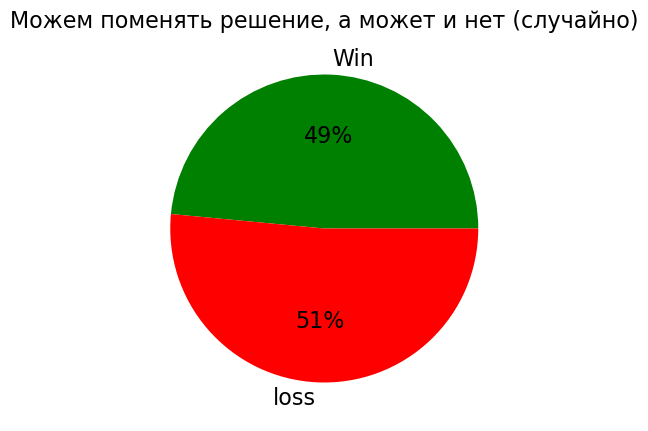

In [16]:
# Расчитаем процент выигрышей, когда мы делали выбор а потом могли его поменять или оставить. 
plt.figure(figsize=(5,5))
val_counts = pd.DataFrame(games['Random_changed'].value_counts()).sort_index()
plt.pie(val_counts['Random_changed'], labels=val_counts.index, colors=['green', 'red'], autopct='%.0f%%', textprops={'fontsize':16, 'color':'black'})
title_obj = plt.title('Можем поменять решение, а может и нет (случайно)', )
plt.setp(title_obj, color='black')
plt.setp(title_obj, fontsize='16')
plt.show()

Т е если мы будем рассуждать о том, сменить ли нам выбор или нет. В одних случаях сменять, а в других нет, то ожидаемо мы получим вероятность 50/50. Но лучших результатов (67% побед) мы бы добились, если бы всегда меняли свой выбор в такой игре.

---
---